In [39]:
import numpy as np
import matplotlib.pyplot as plt

## The advection diffusion equation:

$$\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = D \frac{\partial ^2 u}{\partial x^2} $$
 
 Here $u(x,t)$ denotes concentrtion of hieght of field. The $v \frac{\partial u}{\partial x}$ desceibes the advection term ie wind/current at velocity $v$. And the diffusion term $D\frac{\partial ^2 u}{\partial x^2}$ descibes the spreading / blurring.

The solve we can  use method of lines using finite difference to rerage to get:

$$u_i^{j+1}= -v \frac{u_{i+1} - u_{i-1}}{2 \Delta x} + D\frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta x)^2}$$

and progress with RK4

Okiiii 

In [54]:
## parameters:
L = 10.0
v = 20.0
D = 0.1

## IC
sigma = 0.1
amplitude = 5.0
x0 = L/4
t_final = 3



## discretization stuff:
nx = 200
dx = L / (nx - 1)

dt = min(dx/v, (dx**2)/(2*D))/2
nt = int(t_final/dt) + 1

# Verify stability
print(f"CFL number: {v*dt/dx}")  # Should be <= 1
print(f"Diffusion number: {D*dt/(dx**2)}")  # Should be <= 0.5
print(f"dt = {dt}, nt = {nt}")

CFL number: 0.5
Diffusion number: 0.04975
dt = 0.001256281407035176, nt = 2389


In [55]:

t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

print(u[:,0])##  time array
print(u[0,:]) ## initial position array

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [56]:
u[0,:] = amplitude*np.exp(-(x-L/2)**2/(2*sigma**2))

# Apply Dirichlet boundary conditions
u[0, 0] = 0
u[0, -1] = 0


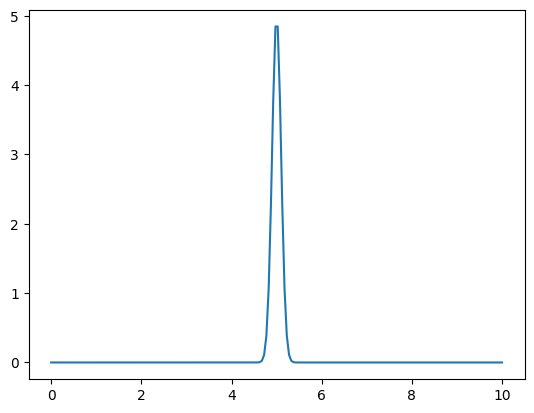

In [57]:
u[0,:]

plt.plot(x, u[0,:])

## loooop:

In [58]:
for j in range(0, nt-2):
    # we need arrays for each k stage:
    k1 = np.zeros(nx)
    k2 = np.zeros(nx)
    k3 = np.zeros(nx)
    k4 = np.zeros(nx)

    # k1s:
    for i in range(0, nx-1):
        k1[i] = -v*((u[j, i+1] - u[j, i-1])/(2*dx)) + D*((u[j,i+1] - 2*u[j,i] + u[j,i-1])/(dx**2))
    
    # k2s:
    u_temp = u[j,:] + (dt/2)*k1
    for i in range(0, nx-1):
        k2[i] = -v*((u_temp[i+1] - u_temp[i-1])/(2*dx)) + D*((u_temp[i+1] - 2*u_temp[i] + u_temp[i-1])/(dx**2))

    # k3s:
    u_temp = u[j,:] + (dt/2)*k2
    for i in range(0, nx-1):
        k3[i] = -v*((u_temp[i+1] - u_temp[i-1])/(2*dx)) + D*((u_temp[i+1] - 2*u_temp[i] + u_temp[i-1])/(dx**2))
    
    # k4s:
    u_temp = u[j,:] + (dt)*k3
    for i in range(0, nx-1):
        k4[i] = -v*((u_temp[i+1] - u_temp[i-1])/(2*dx)) + D*((u_temp[i+1] - 2*u_temp[i] + u_temp[i-1])/(dx**2))
    
    u[j+1, :] = u[j,:] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)/6


    ## boundary conditions!!
    u[j+1, 0] = 0
    u[j+1, -1] = 0


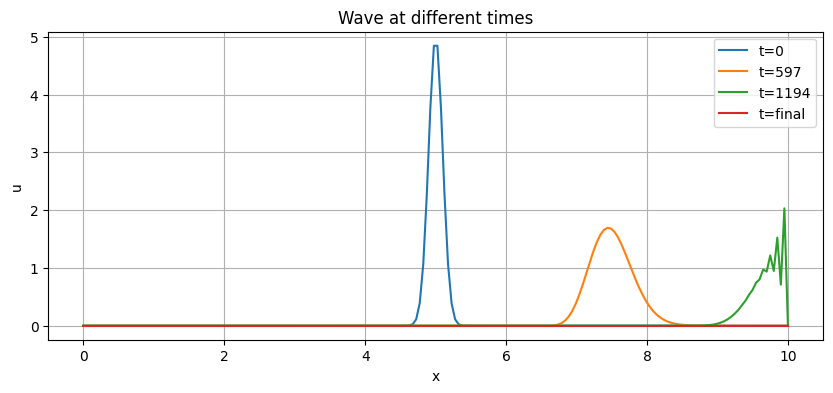

In [59]:

# Plot a few time snapshots
plt.figure(figsize=(10, 4))
plt.plot(x, u[0, :], label='t=0')
plt.plot(x, u[nt//4, :], label=f't={nt//4}')
plt.plot(x, u[nt//2, :], label=f't={nt//2}')
plt.plot(x, u[-1, :], label='t=final')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.title('Wave at different times')
plt.show()

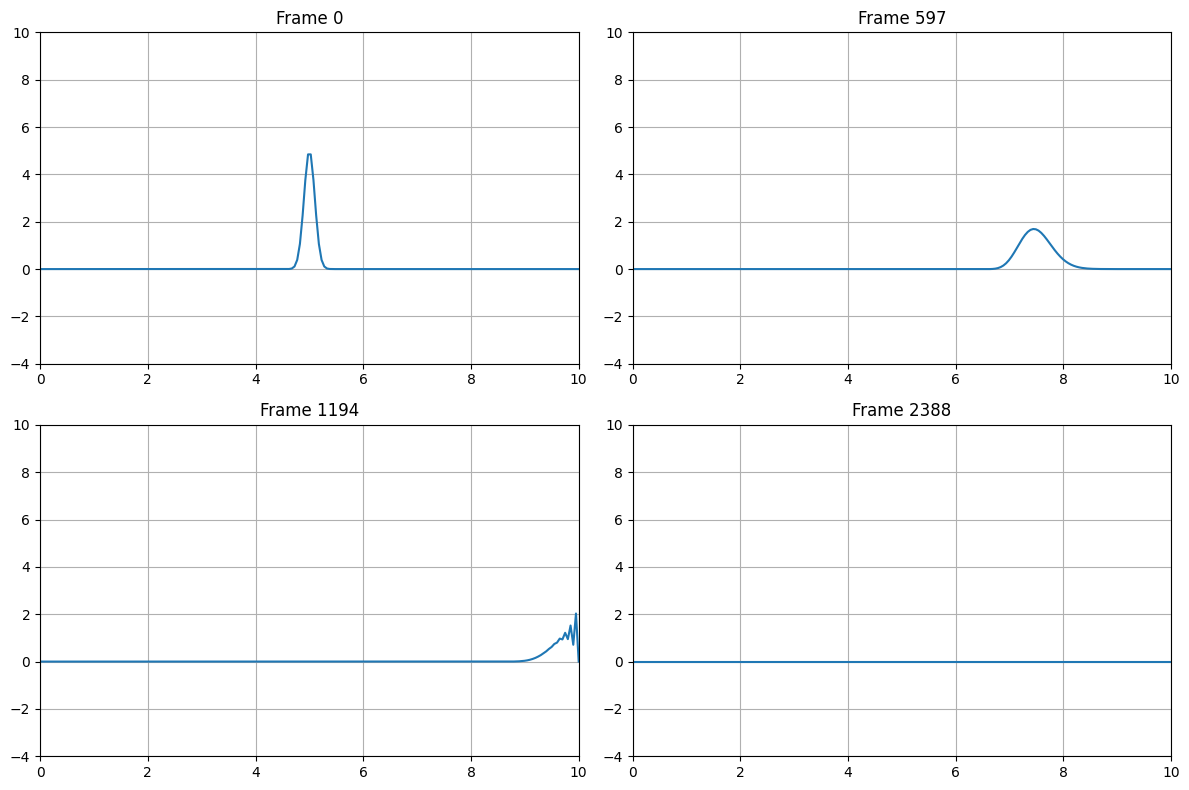

In [60]:
# Simple test - manually plot a few frames
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

frames_to_plot = [0, nt//4, nt//2, nt-1]
for idx, frame in enumerate(frames_to_plot):
    axes[idx].plot(x, u[frame, :])
    axes[idx].set_xlim(0, L)
    axes[idx].set_ylim(-4, L)
    axes[idx].set_title(f'Frame {frame}')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

In [63]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 3))
line, = ax.plot(x, u[0, :], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-4, amplitude + amplitude/6)
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.grid(True)

def animate(frame):
    line.set_ydata(u[frame, :])
    ax.set_title(f't = {t[frame]:.2f}s')
    return line,

# Only use 50 frames total (much less!)
skip = max(1, nt // 100)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=100, blit=True)

# Save with lower quality
anim.save('advection_diffuion_1D_dirichlet.gif', writer=PillowWriter(fps=10), dpi=80)
print("Saved!")

plt.close()

Saved!


## the neuman (more interesting; bouncy) condition

In [136]:
## parameters:
L = 5.0
v = 0.2
D = 0.05

## IC
sigma = 0.1
amplitude = 10.0
x0 = 7*L/8
t_final = 3



## discretization stuff:
nx = 200
dx = L / (nx - 1)

dt = min(dx/v, (dx**2)/(2*D))/2
nt = int(t_final/dt) + 1

# Verify stability
print(f"CFL number: {v*dt/dx}")  # Should be <= 1
print(f"Diffusion number: {D*dt/(dx**2)}")  # Should be <= 0.5
print(f"dt = {dt}, nt = {nt}")



CFL number: 0.02512562814070352
Diffusion number: 0.25
dt = 0.0031564859473245627, nt = 951


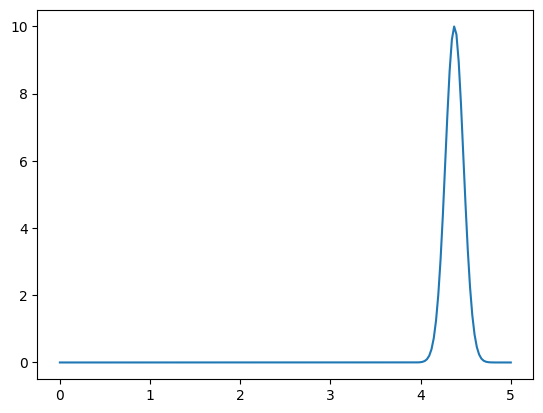

In [137]:

t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

u[0,:] = amplitude*np.exp(-(x-x0)**2/(2*sigma**2))

# Apply Dirichlet boundary conditions
u[0, 0] = u[0, 1]
u[0, -1] = u[0,-2]

u[0,:]

plt.plot(x, u[0,:])

In [138]:
for j in range(0, nt-1):
    # we need arrays for each k stage:
    k1 = np.zeros(nx)
    k2 = np.zeros(nx)
    k3 = np.zeros(nx)
    k4 = np.zeros(nx)

    

    # k1s:
    u_current = u[j, :].copy()
    u_current[0] = u_current[1]
    u_current[-1] = u_current[-2]
    for i in range(1, nx-1):
        k1[i] = -v*((u_current[i+1] - u_current[i-1])/(2*dx)) + D*((u_current[i+1] - 2*u_current[i] + u_current[i-1])/(dx**2))
        
    # k2s:
    u_temp = u[j,:] + (dt/2)*k1
    u_temp[0] = u_temp[1]
    u_temp[-1] = u_temp[-2] ## neuamnn bc
    for i in range(1, nx-1):
        k2[i] = -v*((u_temp[i+1] - u_temp[i-1])/(2*dx)) + D*((u_temp[i+1] - 2*u_temp[i] + u_temp[i-1])/(dx**2))

    # k3s:
    u_temp = u[j,:] + (dt/2)*k2
    u_temp[0] = u_temp[1]
    u_temp[-1] = u_temp[-2] ## neuamnn bc
    for i in range(1, nx-1):
        k3[i] = -v*((u_temp[i+1] - u_temp[i-1])/(2*dx)) + D*((u_temp[i+1] - 2*u_temp[i] + u_temp[i-1])/(dx**2))
    
    # k4s:
    u_temp = u[j,:] + (dt)*k3
    u_temp[0] = u_temp[1]
    u_temp[-1] = u_temp[-2] ## neuamnn bc
    for i in range(1, nx-1):
        k4[i] = -v*((u_temp[i+1] - u_temp[i-1])/(2*dx)) + D*((u_temp[i+1] - 2*u_temp[i] + u_temp[i-1])/(dx**2))
    
    u[j+1, :] = u[j,:] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)


    ## boundary conditions!!
    u[j+1, 0] = u[j+1, 1] 
    u[j+1, -1] = u[j+1, -2] 

    if j % 100 == 0:
        total_mass = np.sum(u[j, 1:-1]) * dx  # Only interior points
        print(f"j={j}, total mass={total_mass:.4f}")


j=0, total mass=2.5066
j=100, total mass=2.5032
j=200, total mass=2.4586
j=300, total mass=2.3534
j=400, total mass=2.2091
j=500, total mass=2.0475
j=600, total mass=1.8827
j=700, total mass=1.7226
j=800, total mass=1.5713
j=900, total mass=1.4306


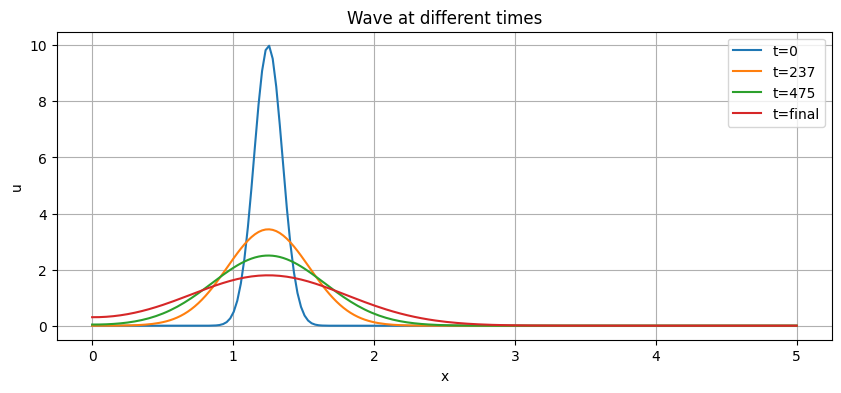

In [127]:

# Plot a few time snapshots
plt.figure(figsize=(10, 4))
plt.plot(x, u[0, :], label='t=0')
plt.plot(x, u[nt//4, :], label=f't={nt//4}')
plt.plot(x, u[nt//2, :], label=f't={nt//2}')
plt.plot(x, u[-1, :], label='t=final')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.title('Wave at different times')
plt.show()

In [128]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 3))
line, = ax.plot(x, u[0, :], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-4, amplitude + amplitude/6)
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.grid(True)

def animate(frame):
    line.set_ydata(u[frame, :])
    ax.set_title(f't = {t[frame]:.2f}s')
    return line,

# Only use 50 frames total (much less!)
skip = max(1, nt // 100)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=100, blit=True)

# Save with lower quality
anim.save('advection_diffuion_1D_neumann.gif', writer=PillowWriter(fps=10), dpi=80)
print("Saved!")

plt.close()

Saved!


In [84]:
""

''